# Vamos ver a distribuição da volatilidade do ibovespa e do S&P500 e ver se parece com uma distribuição log normal: 

**Importamos os módulos necessários:**

In [39]:
import pandas as pd
from pandas_datareader import data as dt
import numpy as np 
import matplotlib.pyplot as plt

**Importando e estruturando os dados:**

In [42]:
# Pegando os dados do Ibovespa e do S&P500 do Yahoo Finance:
ibov_data = dt.DataReader('^BVSP',data_source='yahoo',start='1993-01-01')
sp_data = dt.DataReader('^GSPC',data_source='yahoo',start='1980-01-01')

# Montando os dados de retornos diários do Ibovespa:
ibov_daily_returns = ibov_data['Adj Close'].pct_change()
sp_daily_returns = sp_data['Adj Close'].pct_change()

# Montando o número de dias da janela a ser analisada:
k = 7

# Montamos a volatilidade anualizada do ibovespa em janelas de k dias:
ibov_krolling_volatility = ibov_daily_returns.rolling(window=k).std()*252**0.5
sp_krolling_volatility = sp_daily_returns.rolling(window=k).std()*252**0.5

**Plotando os dados:**

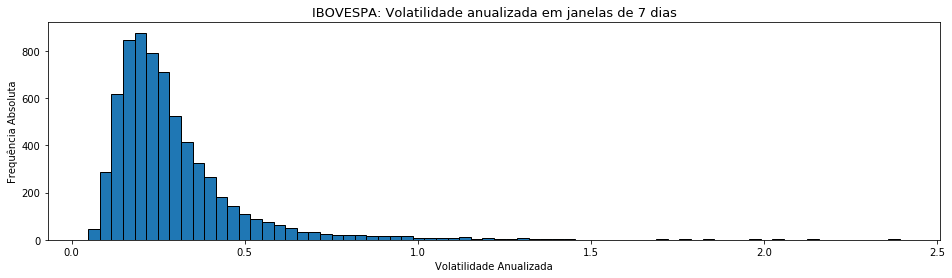

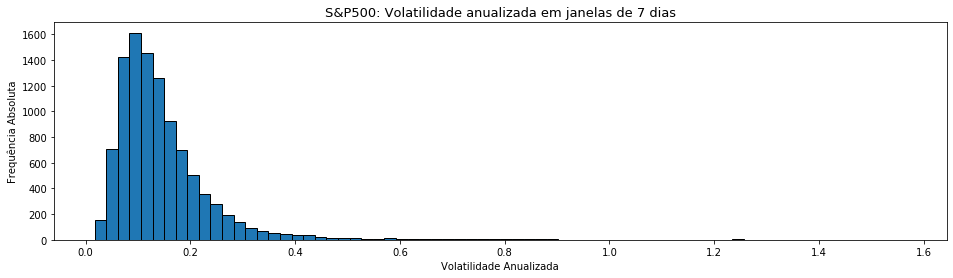

In [43]:
plt.figure(figsize=(16,4))
plt.hist(ibov_krolling_volatility,bins=70,edgecolor='Black')
plt.title('IBOVESPA: Volatilidade anualizada em janelas de '+str(k)+' dias',fontsize=13)
plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Frequência Absoluta')
plt.show()

plt.figure(figsize=(16,4))
plt.hist(sp_krolling_volatility,bins=70,edgecolor='Black')
plt.title('S&P500: Volatilidade anualizada em janelas de '+str(k)+' dias',fontsize=13)
plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Frequência Absoluta')
plt.show()